In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
df = pd.read_csv('merge_drop.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,1708250,1.700693e+05,18974.2767,182005.7196,66.0400,4389.1423,3.9559,4471.0154,79,34,589,5,152,44,49,10,93,751,0
1,2018-01-01,남원읍,1239600,2.844582e+05,17722.5033,213841.0388,34.4275,2025.4415,0.0000,6943.3756,108,54,466,25,295,34,15,5,93,481,5
2,2018-01-01,노형동,9357900,1.171498e+06,71832.9032,424610.4374,117.6627,10849.9819,476.9493,40893.5259,1007,216,4905,123,943,363,236,54,987,3658,15
3,2018-01-01,대륜동,1717700,2.647160e+05,19962.1370,208720.9279,74.6425,2145.7763,210.6290,1720.2115,128,29,859,20,142,64,34,15,167,574,0
4,2018-01-01,대정읍,1264950,3.631059e+05,15910.1806,154216.7805,155.0755,3992.3257,453.0044,16733.5733,137,44,864,34,74,69,79,0,137,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,표선면,1377450,2.392844e+05,23520.9584,158051.6026,57.3384,2546.3164,137.6136,3722.4027,60,35,423,75,236,20,35,10,45,397,0
48417,2021-06-30,한경면,973850,1.674179e+05,16029.6225,98566.2468,177.7496,4370.9311,197.8190,5301.0457,80,20,423,40,241,40,25,5,70,342,0
48418,2021-06-30,한림읍,3298100,4.704850e+05,49193.1065,286951.1996,395.6380,12591.3604,283.8275,23002.8245,136,80,669,257,599,106,80,0,166,946,5
48419,2021-06-30,화북동,3749600,5.725006e+05,50152.6139,241048.3899,154.8145,1885.6891,258.0252,5436.4410,362,352,1645,644,513,146,50,15,282,1635,0


In [4]:
train = df[df['base_date'] <= '2020-12-31']
test = df[df['base_date'] > '2020-12-31']

In [5]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [6]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [7]:
train_한림읍_inf = 한림읍_train.iloc[:, 2:].values
test_한림읍_inf = 한림읍_test.iloc[:, 2:].values

train_애월읍_inf = 애월읍_train.iloc[:, 2:].values
test_애월읍_inf = 애월읍_test.iloc[:, 2:].values

train_구좌읍_inf = 구좌읍_train.iloc[:, 2:].values
test_구좌읍_inf = 구좌읍_test.iloc[:, 2:].values

train_조천읍_inf = 조천읍_train.iloc[:, 2:].values
test_조천읍_inf = 조천읍_test.iloc[:, 2:].values

train_한경면_inf = 한경면_train.iloc[:, 2:].values
test_한경면_inf = 한경면_test.iloc[:, 2:].values

train_일도1동_inf = 일도1동_train.iloc[:, 2:].values
test_일도1동_inf = 일도1동_test.iloc[:, 2:].values

train_일도2동_inf = 일도2동_train.iloc[:, 2:].values
test_일도2동_inf = 일도2동_test.iloc[:, 2:].values

train_이도1동_inf = 이도1동_train.iloc[:, 2:].values
test_이도1동_inf = 이도1동_test.iloc[:, 2:].values

train_이도2동_inf = 이도2동_train.iloc[:, 2:].values
test_이도2동_inf = 이도2동_test.iloc[:, 2:].values

train_삼도1동_inf = 삼도1동_train.iloc[:, 2:].values
test_삼도1동_inf = 삼도1동_test.iloc[:, 2:].values

train_삼도2동_inf = 삼도2동_train.iloc[:, 2:].values
test_삼도2동_inf = 삼도2동_test.iloc[:, 2:].values

train_용담1동_inf = 용담1동_train.iloc[:, 2:].values
test_용담1동_inf = 용담1동_test.iloc[:, 2:].values

train_용담2동_inf = 용담2동_train.iloc[:, 2:].values
test_용담2동_inf = 용담2동_test.iloc[:, 2:].values

train_건입동_inf = 건입동_train.iloc[:, 2:].values
test_건입동_inf = 건입동_test.iloc[:, 2:].values

train_화북동_inf = 화북동_train.iloc[:, 2:].values
test_화북동_inf = 화북동_test.iloc[:, 2:].values

train_삼양동_inf = 삼양동_train.iloc[:, 2:].values
test_삼양동_inf = 삼양동_test.iloc[:, 2:].values

train_봉개동_inf = 봉개동_train.iloc[:, 2:].values
test_봉개동_inf = 봉개동_test.iloc[:, 2:].values

train_아라동_inf = 아라동_train.iloc[:, 2:].values
test_아라동_inf = 아라동_test.iloc[:, 2:].values

train_오라동_inf = 오라동_train.iloc[:, 2:].values
test_오라동_inf = 오라동_test.iloc[:, 2:].values

train_연동_inf = 연동_train.iloc[:, 2:].values
test_연동_inf = 연동_test.iloc[:, 2:].values

train_노형동_inf = 노형동_train.iloc[:, 2:].values
test_노형동_inf = 노형동_test.iloc[:, 2:].values

train_외도동_inf = 외도동_train.iloc[:, 2:].values
test_외도동_inf = 외도동_test.iloc[:, 2:].values

train_이호동_inf = 이호동_train.iloc[:, 2:].values
test_이호동_inf = 이호동_test.iloc[:, 2:].values

train_도두동_inf = 도두동_train.iloc[:, 2:].values
test_도두동_inf = 도두동_test.iloc[:, 2:].values

train_대정읍_inf = 대정읍_train.iloc[:, 2:].values
test_대정읍_inf = 대정읍_test.iloc[:, 2:].values

train_남원읍_inf = 남원읍_train.iloc[:, 2:].values
test_남원읍_inf = 남원읍_test.iloc[:, 2:].values

train_성산읍_inf = 성산읍_train.iloc[:, 2:].values
test_성산읍_inf = 성산읍_test.iloc[:, 2:].values

train_안덕면_inf = 안덕면_train.iloc[:, 2:].values
test_안덕면_inf = 안덕면_test.iloc[:, 2:].values

train_표선면_inf = 표선면_train.iloc[:, 2:].values
test_표선면_inf = 표선면_test.iloc[:, 2:].values

train_송산동_inf = 송산동_train.iloc[:, 2:].values
test_송산동_inf = 송산동_test.iloc[:, 2:].values

train_정방동_inf = 정방동_train.iloc[:, 2:].values
test_정방동_inf = 정방동_test.iloc[:, 2:].values

train_중앙동_inf = 중앙동_train.iloc[:, 2:].values
test_중앙동_inf = 중앙동_test.iloc[:, 2:].values

train_천지동_inf = 천지동_train.iloc[:, 2:].values
test_천지동_inf = 천지동_test.iloc[:, 2:].values

train_효돈동_inf = 효돈동_train.iloc[:, 2:].values
test_효돈동_inf = 효돈동_test.iloc[:, 2:].values

train_영천동_inf = 영천동_train.iloc[:, 2:].values
test_영천동_inf = 영천동_test.iloc[:, 2:].values

train_동홍동_inf = 동홍동_train.iloc[:, 2:].values
test_동홍동_inf = 동홍동_test.iloc[:, 2:].values

train_서홍동_inf = 서홍동_train.iloc[:, 2:].values
test_서홍동_inf = 서홍동_test.iloc[:, 2:].values

train_대륜동_inf = 대륜동_train.iloc[:, 2:].values
test_대륜동_inf = 대륜동_test.iloc[:, 2:].values

train_대천동_inf = 대천동_train.iloc[:, 2:].values
test_대천동_inf = 대천동_test.iloc[:, 2:].values

train_중문동_inf = 중문동_train.iloc[:, 2:].values
test_중문동_inf = 중문동_test.iloc[:, 2:].values

train_예래동_inf = 예래동_train.iloc[:, 2:].values
test_예래동_inf = 예래동_test.iloc[:, 2:].values

train_알수없음_inf = 알수없음_train.iloc[:, 2:].values
test_알수없음_inf = 알수없음_test.iloc[:, 2:].values

In [8]:
애월읍_train

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
17,2018-01-01,애월읍,299650,743786.8455,51333.7743,544075.8708,137.8289,20256.9542,739.2770,22402.0521,246,29,1296,34,849,123,88,29,339,1345,0
54,2018-01-02,애월읍,295850,729522.8775,77569.8479,451071.2751,113.7564,16759.3579,713.2428,23590.8064,324,74,1345,44,849,128,88,15,246,1591,0
91,2018-01-03,애월읍,222900,723440.8307,75174.4296,452047.5392,92.6581,16679.0974,704.2344,22919.7851,393,74,1213,15,805,187,25,5,285,1566,0
128,2018-01-04,애월읍,275200,690647.4828,77057.5769,458212.4463,94.4185,16603.1330,700.2835,21710.8176,417,93,1228,34,717,172,59,20,246,1527,5
165,2018-01-05,애월읍,219750,710486.8381,77594.1292,456106.2954,119.4281,13811.9047,730.0550,22510.6750,358,79,1198,0,854,172,108,15,319,1532,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41414,2020-12-27,애월읍,2470250,929636.8757,56460.6911,447538.3622,594.5766,40532.5960,289.7424,20072.6578,274,61,1341,427,975,183,41,5,305,1300,0
41451,2020-12-28,애월읍,3645500,867625.0411,80624.3640,442406.2887,642.8671,39012.6703,256.5432,18145.0672,376,157,1412,366,1153,127,51,5,310,1509,10
41490,2020-12-29,애월읍,2495800,860731.3060,78792.7547,400483.0253,504.0323,15350.4912,256.5432,15435.4811,366,152,1443,386,1270,213,66,20,320,1661,0
41529,2020-12-30,애월읍,1818050,878183.9776,74460.9159,349233.7316,389.3428,9492.7558,286.7243,15150.4660,284,112,1224,188,1016,132,41,25,315,1240,0


In [9]:
애월읍_test

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
41606,2021-01-01,애월읍,3069150,958215.0787,56341.7665,394252.4179,698.2298,18313.9553,361.5836,20367.5192,324,66,1543,486,1159,152,25,10,349,1149,5
41644,2021-01-02,애월읍,3244250,942552.3475,67497.4161,458130.9157,769.9228,40360.7909,374.0520,27335.0930,364,86,1392,385,1083,228,51,0,445,1594,0
41681,2021-01-03,애월읍,3492150,959312.5395,63861.8666,432596.5075,797.9768,37141.5765,358.4665,23172.8817,309,46,1361,476,1027,218,71,5,339,1204,0
41718,2021-01-04,애월읍,3007850,908228.9457,85883.6809,395793.1055,504.9702,40160.9842,345.9981,24059.3866,288,162,1169,314,1052,182,76,0,293,1437,5
41754,2021-01-05,애월읍,2749500,902764.7302,80094.8783,346571.4733,445.7452,15747.5073,367.8178,19492.1680,374,101,1442,405,1169,162,10,25,380,1574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,2021-06-26,애월읍,3382400,832318.3824,65810.1897,677372.7050,1080.8387,21266.8736,298.1624,16816.3033,433,191,1102,604,1454,292,96,30,473,2465,0
48289,2021-06-27,애월읍,3807350,865588.1957,58636.8807,646276.6664,931.7574,18897.2941,366.9693,16811.2829,287,151,1589,704,1202,262,75,15,493,1791,0
48325,2021-06-28,애월읍,3195850,822202.2071,86362.1449,633747.8408,1020.6330,20753.7765,298.1622,16349.6306,382,126,1323,377,1227,211,60,10,397,1937,0
48361,2021-06-29,애월읍,3577300,813768.5690,86314.3088,642167.1896,1175.4485,22729.2206,260.8916,16680.9280,302,70,1358,498,1403,151,101,20,297,2118,0


In [10]:
train_애월읍_inf.shape

(1092, 19)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr

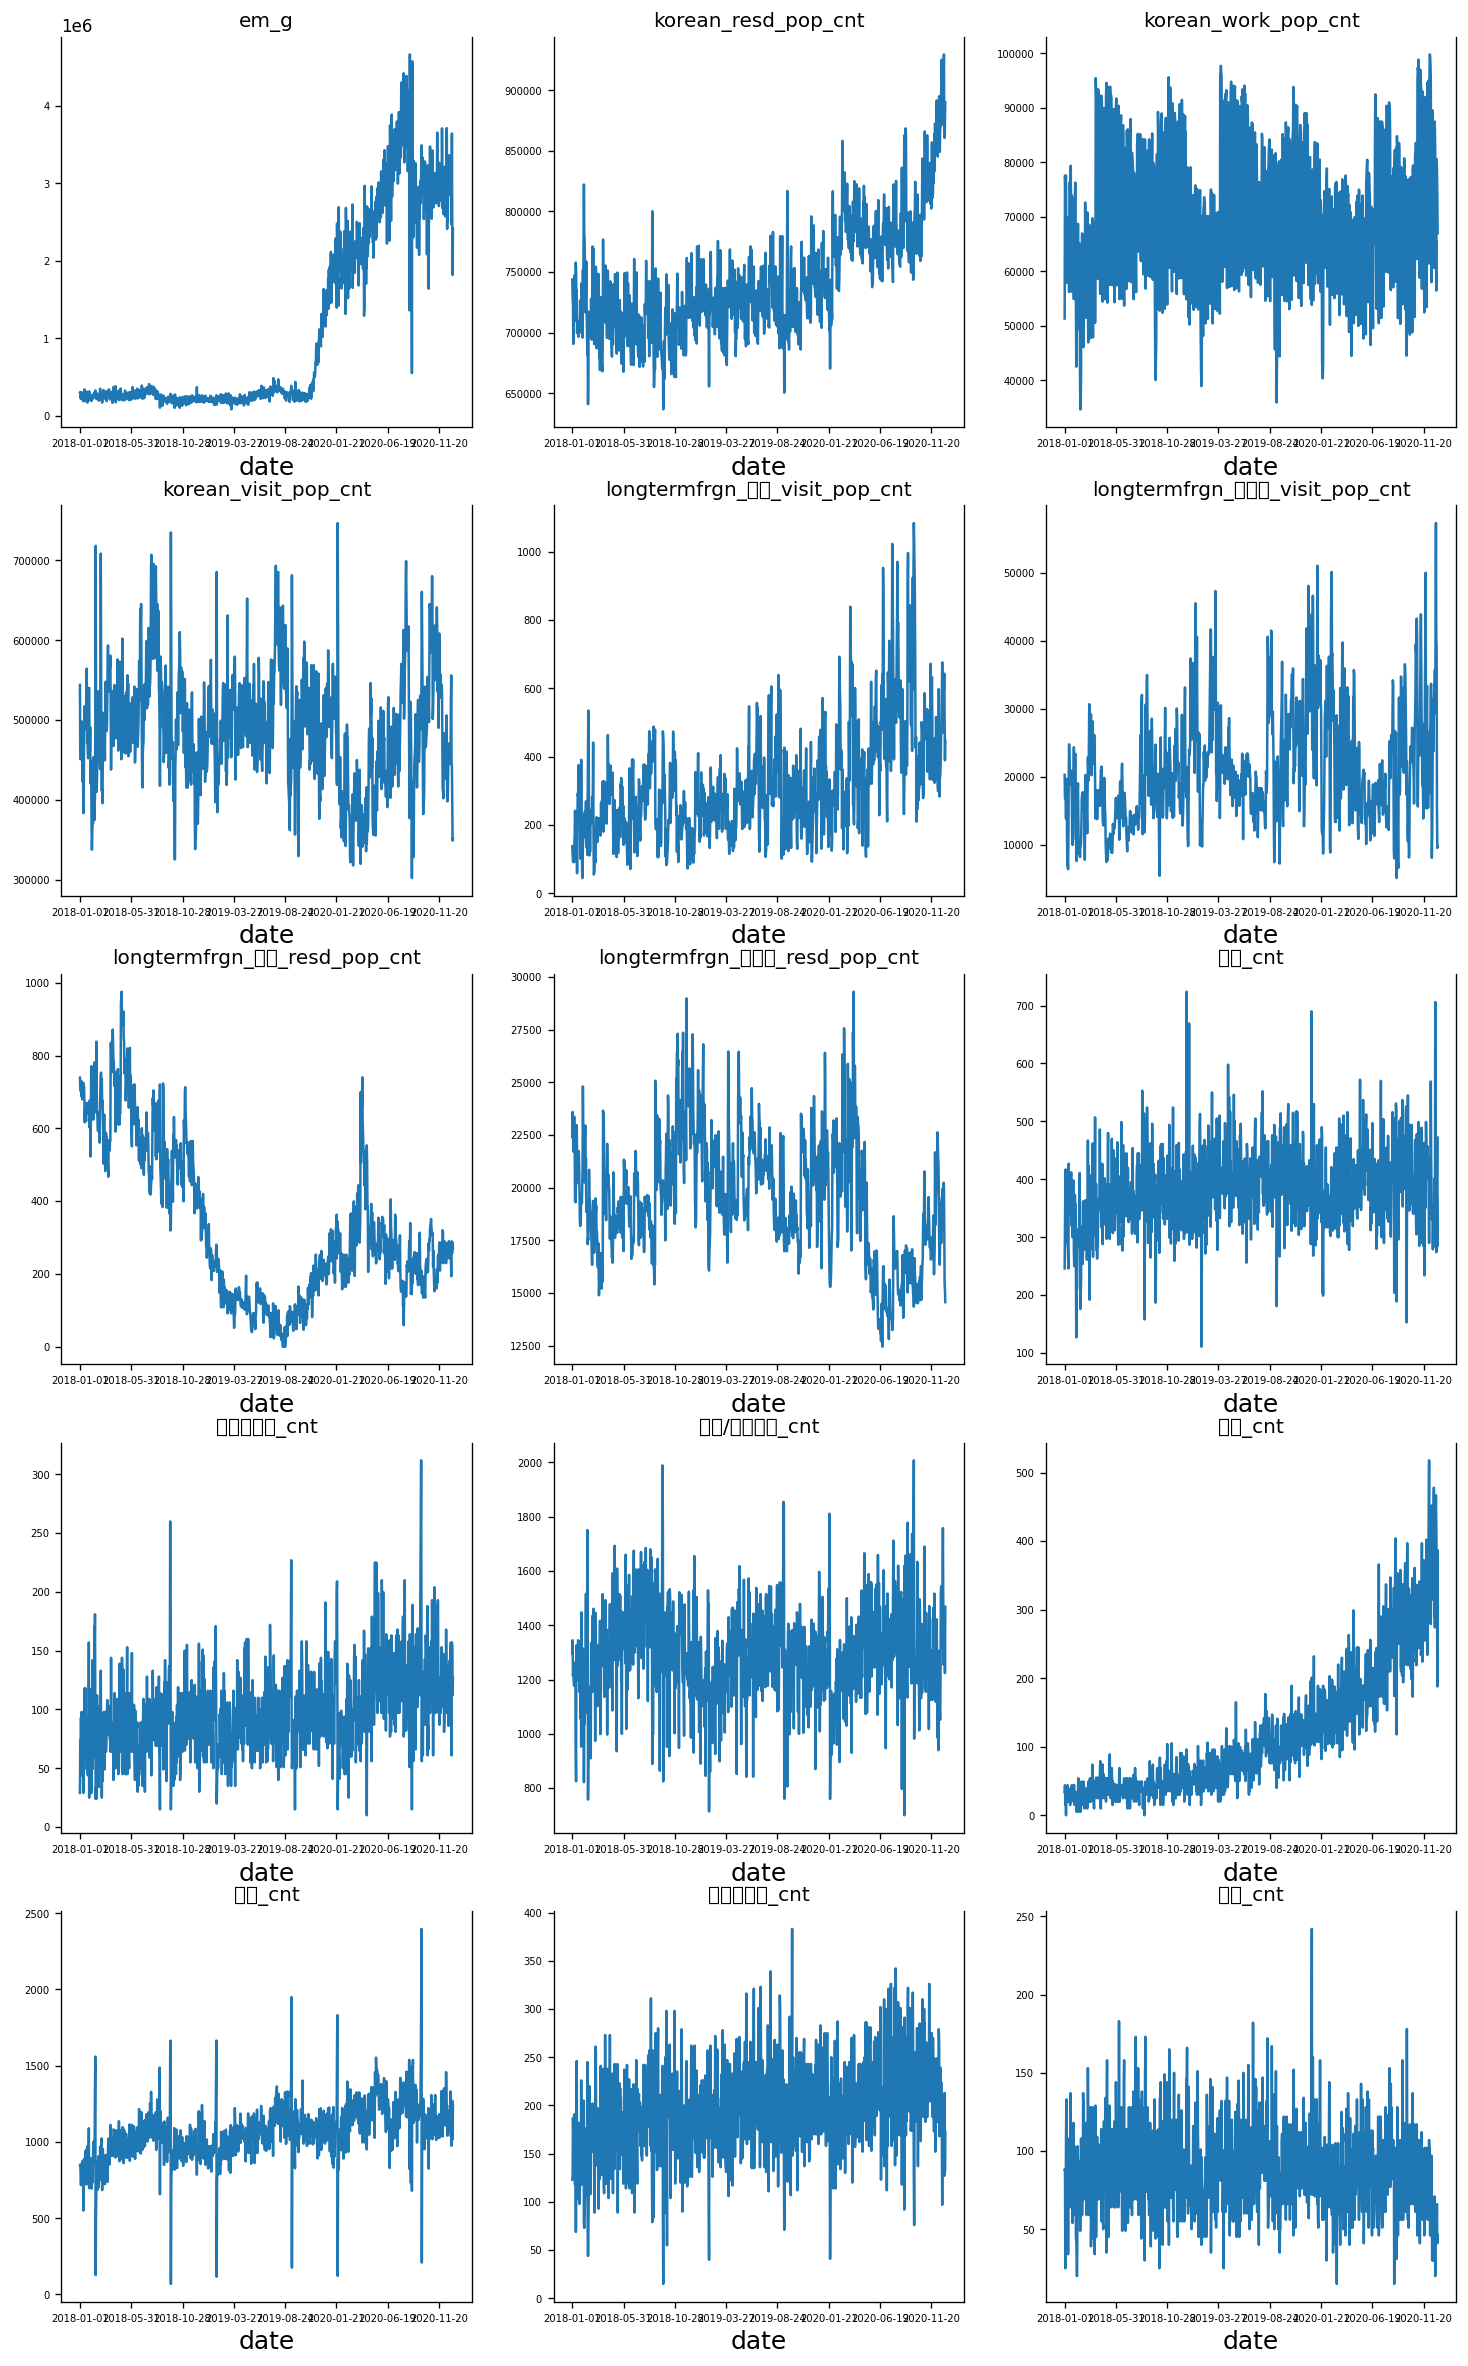

In [11]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(15,25))
for i, ax in enumerate(axes.flatten()):
    x = 애월읍_train['base_date']
    data = 애월읍_train[애월읍_train.columns[i+2]]
    ax.plot(x, data)
    ax.set_title(애월읍_train.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_애월읍 = MinMaxScaler(feature_range = (0, 1))
train_애월읍_inf_scaled = sc_애월읍.fit_transform(train_애월읍_inf)

In [13]:
# Creating a data structure with 60 timesteps and 15 output
X_train = []
y_train = []
for i in range(60, 1092):
    X_train.append(train_애월읍_inf_scaled[i-60:i, :])
    y_train.append(train_애월읍_inf_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1032, 60, 19)

In [14]:
!pip install tensorflow

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 19)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 200, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 250, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100))
Model.add(Dropout(0.2))
Model.add(Dense(units = 19))

In [22]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
52/52 [==============================] - 32s 466ms/step - loss: 0.0330
Epoch 2/200
52/52 [==============================] - 25s 476ms/step - loss: 0.0214
Epoch 3/200
52/52 [==============================] - 26s 494ms/step - loss: 0.0199
Epoch 4/200
52/52 [==============================] - 26s 504ms/step - loss: 0.0186
Epoch 5/200
52/52 [==============================] - 26s 505ms/step - loss: 0.0184
Epoch 6/200
52/52 [==============================] - 26s 503ms/step - loss: 0.0177
Epoch 7/200
52/52 [==============================] - 26s 498ms/step - loss: 0.0172
Epoch 8/200
52/52 [==============================] - 26s 507ms/step - loss: 0.0167
Epoch 9/200
52/52 [==============================] - 28s 538ms/step - loss: 0.0168
Epoch 10/200
52/52 [==============================] - 28s 545ms/step - loss: 0.0163
Epoch 11/200
52/52 [==============================] - 27s 520ms/step - loss: 0.0163
Epoch 12/200
52/52 [==============================] - 26s 506ms/step - loss: 0.0160
E

In [23]:
# Getting the predicted value
애월읍_total = pd.concat((애월읍_train, 애월읍_test), axis = 0).drop(['base_date', 'emd_nm'], axis=1)
inputs = 애월읍_total[len(애월읍_total) - len(애월읍_test) - 60:].values
inputs = sc_애월읍.transform(inputs)
X_test = []
for i in range(60, 241):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 10))
pred_inf = Model.predict(X_test)
pred_inf = sc_애월읍.inverse_transform(pred_inf)
X_test.shape

(181, 60, 19)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_

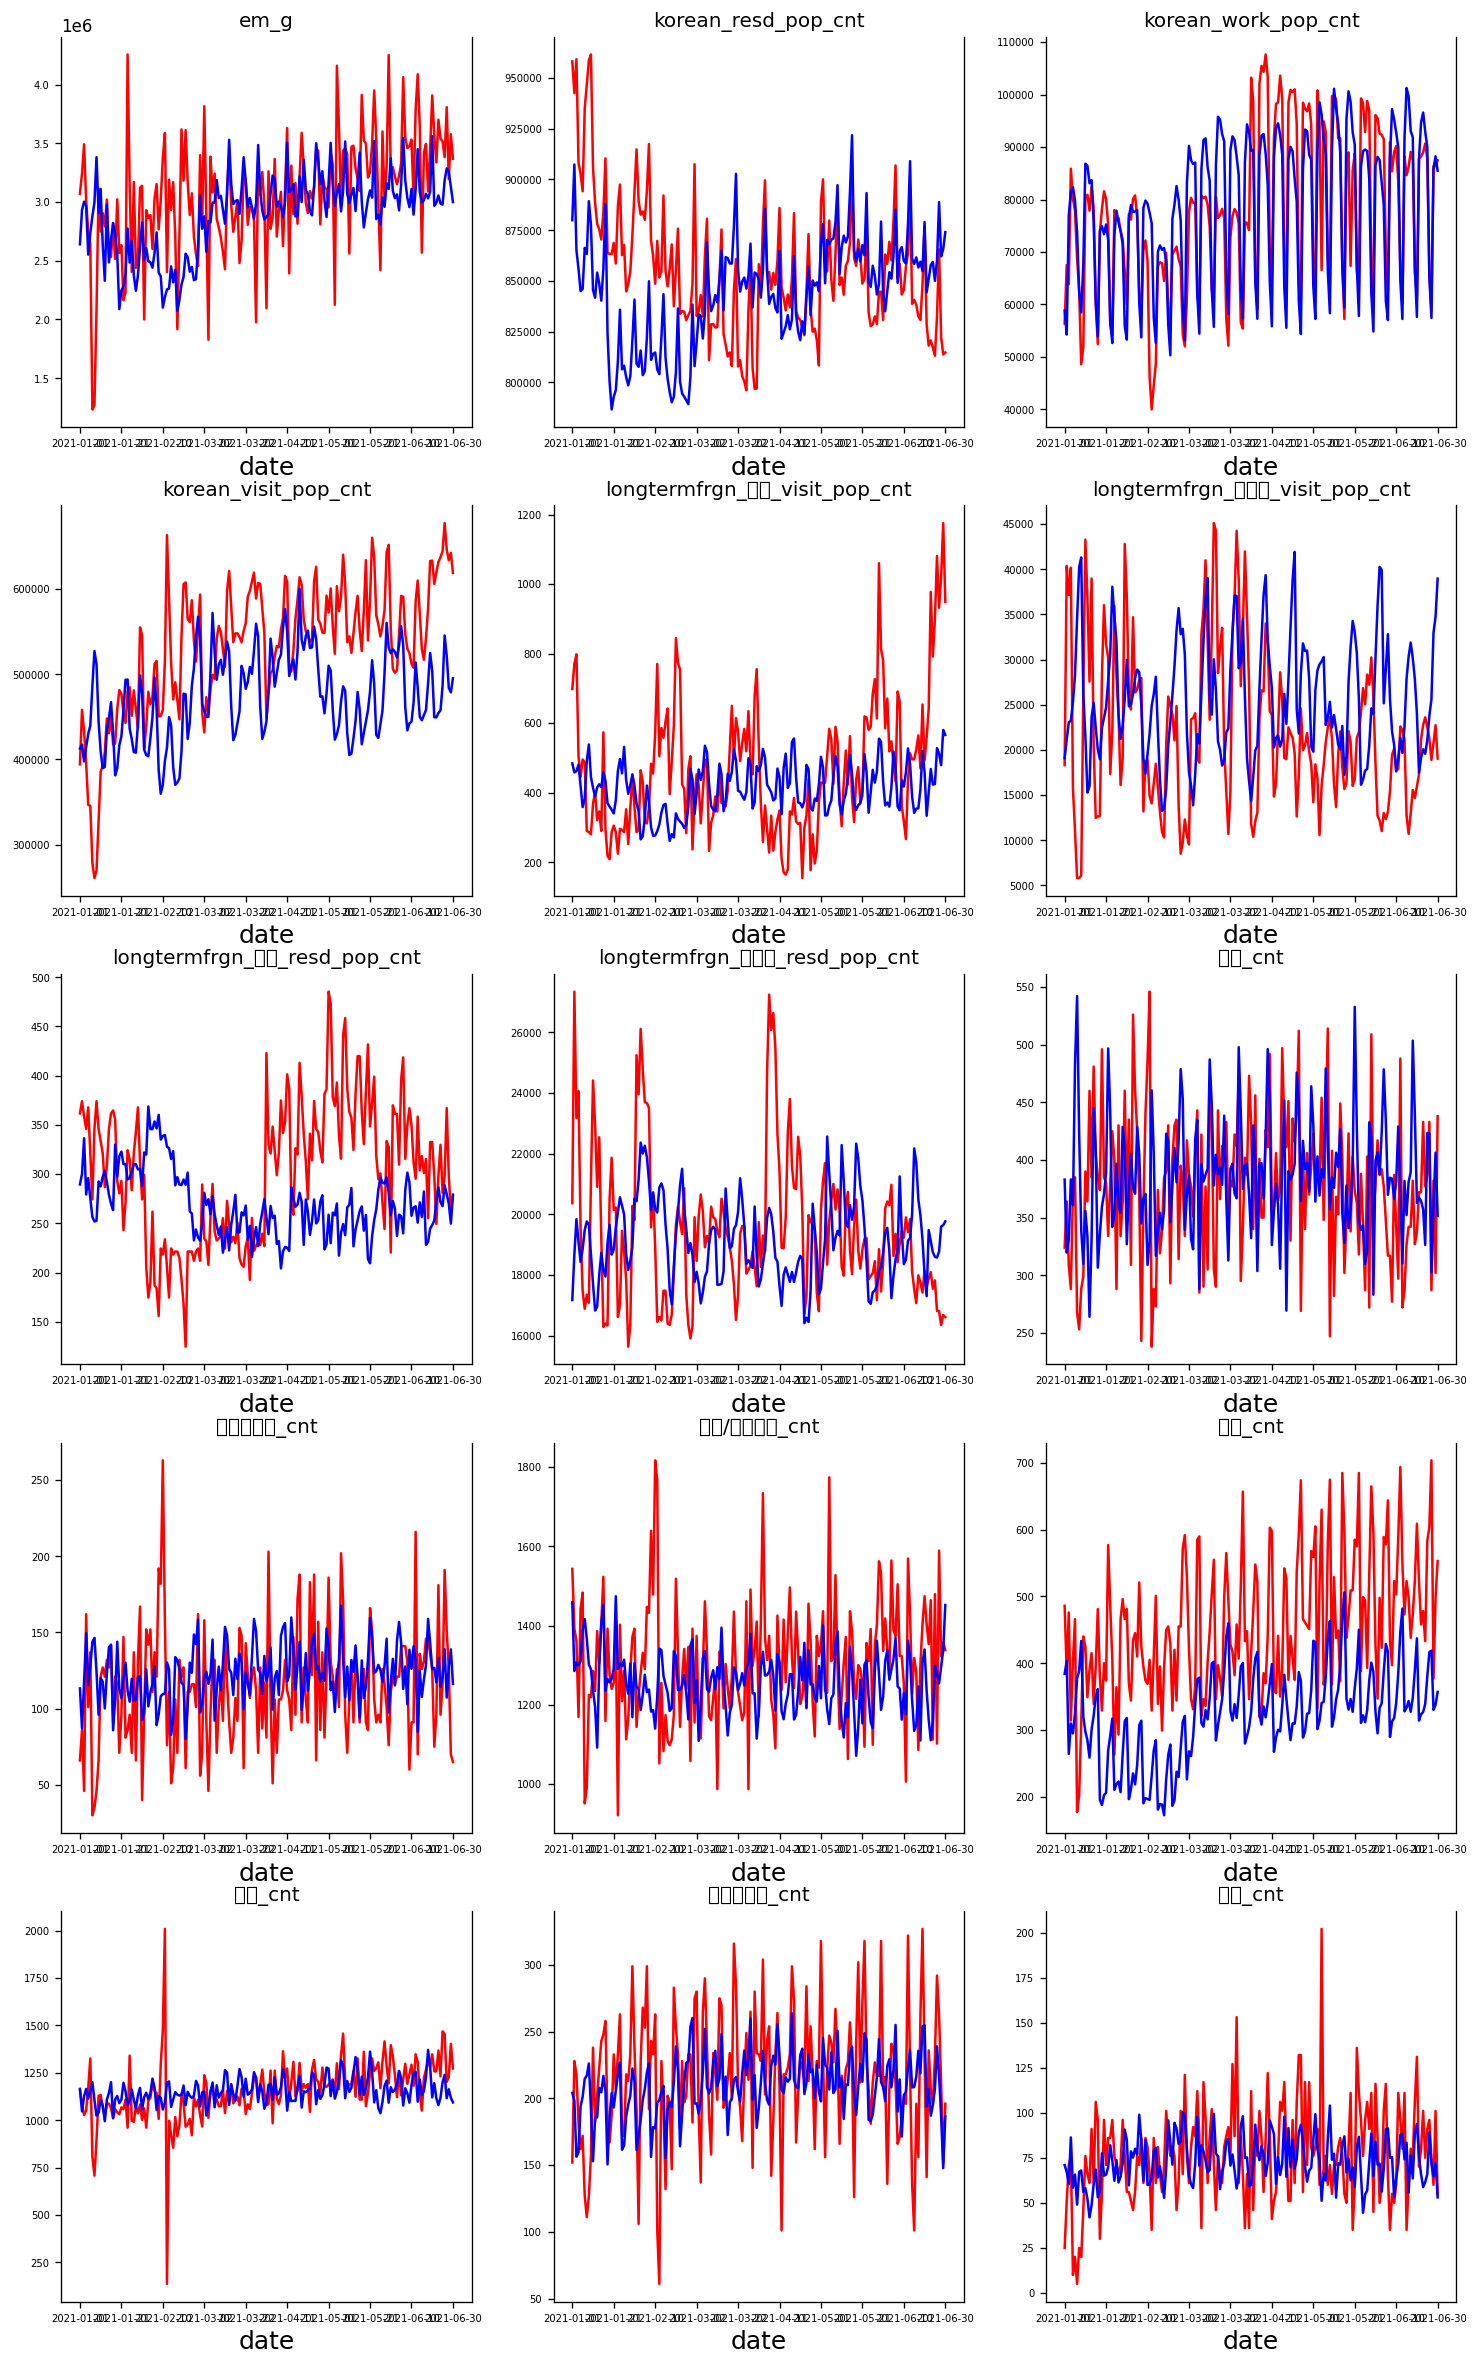

In [24]:
# Plot
fig2, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(15,25))
for i, ax in enumerate(axes.flatten()):
    x = 애월읍_test['base_date']
    data = 애월읍_test[애월읍_test.columns[i+2]]
    data2 = pred_inf[:,i]
    ax.plot(x, data, color = 'red', label = 'Real')
    ax.plot(x, data2, color = 'blue', label = 'Predict')
    ax.set_title(애월읍_test.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [25]:
def root_MSE(x,y):
    root = 0
    for i in range(0,len(x)):
        root += (list(x)[i]-y[i])**2
    root = math.sqrt(root / len(x))
    return root

In [26]:
for i in range(0, 15):
    data = 애월읍_test[애월읍_test.columns[i+2]]
    data2 = pred_inf[:,i]
    print("RMSE of", 애월읍_test.columns[i+2], ":", root_MSE(data, data2))

RMSE of em_g : 500016.9545601277
RMSE of korean_resd_pop_cnt : 39257.50784525791
RMSE of korean_work_pop_cnt : 9590.73862467064
RMSE of korean_visit_pop_cnt : 93825.32516692337
RMSE of longtermfrgn_기타_visit_pop_cnt : 198.9719983211726
RMSE of longtermfrgn_아시아_visit_pop_cnt : 11125.611931087127
RMSE of longtermfrgn_기타_resd_pop_cnt : 90.59486059010543
RMSE of longtermfrgn_아시아_resd_pop_cnt : 2597.9960310677534
RMSE of 간식_cnt : 73.3419129397076
RMSE of 농축수산물_cnt : 37.354765602087035
RMSE of 마트/슈퍼마켓_cnt : 168.17845862950395
RMSE of 배달_cnt : 156.62697630054956
RMSE of 식품_cnt : 162.78588714473972
RMSE of 아시아음식_cnt : 46.887665509075724
RMSE of 양식_cnt : 28.39937181431072


In [27]:
# Getting the predicted value
inputs = 애월읍_total[len(애월읍_total) - 60:].values
inputs = sc_애월읍.transform(inputs)
Y_predict = []
for i in range(0, 62):
    X_predict = []
    X_predict.append(inputs[i:60+i, :])
    X_predict = np.array(X_predict)
    pred = Model.predict(X_predict)
    inputs = np.concatenate([inputs, pred]) # 61, 15
    pred = sc_애월읍.inverse_transform(pred)
    Y_predict.append(pred)

In [38]:
Y_predict = np.reshape(Y_predict, (62,19))
Y_predict = pd.DataFrame(Y_predict)
Y_predict

,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2892632.50,867152.4375,82550.398438,478593.03125,439.557709,32317.447266,246.345322,18293.904297,534.838440,143.549911,1542.260986,377.064941,1160.792725,207.629608,47.837807,30.182446,435.847748,1744.352905,1.153220
1,2819822.25,876562.0000,71868.750000,517806.62500,421.090179,32374.849609,244.747437,17748.283203,505.040527,160.553696,1507.445557,416.217865,1146.575439,211.224045,53.808933,42.651024,418.184174,1724.701782,1.547771
2,3111392.00,877574.0625,63246.246094,565140.18750,560.226685,43948.687500,233.731125,18774.294922,410.927277,161.141312,1377.934570,440.852692,1126.914429,224.920654,70.920876,28.117496,365.510681,1776.333984,0.504370
3,3258809.00,903775.0000,57900.285156,522606.28125,627.984558,43493.117188,235.214081,19818.390625,313.592102,107.922981,1364.750854,455.018768,1021.906677,244.409103,68.154449,13.960450,300.378418,1594.913330,-0.290615
4,3099899.25,865879.6250,77477.335938,455262.96875,528.347778,34457.496094,272.904999,18784.220703,344.199310,132.644104,1404.429199,330.069794,1116.075684,169.803177,61.361423,11.614724,288.819733,1589.569214,3.098661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2907757.50,877207.6250,61172.062500,530240.50000,430.145447,40847.867188,250.227081,18826.929688,456.747589,151.777374,1454.345947,410.082062,1114.750488,203.238495,57.422901,35.928986,433.152496,1529.166260,-0.306608
58,3252362.00,889277.5625,61813.449219,543375.25000,578.033325,53157.089844,227.123672,20118.339844,345.669952,137.548676,1286.840576,454.458832,1049.150513,208.274521,55.363205,14.689447,297.671844,1573.773682,0.300005
59,2867541.00,908048.8750,57739.054688,474841.62500,577.270752,40145.101562,273.656921,19974.527344,272.531189,76.259377,1324.682495,420.053040,983.943848,207.826645,51.976131,5.919257,299.809235,1378.164429,-0.125820
60,3457133.75,863088.4375,81392.500000,438926.84375,602.005676,38800.359375,266.769012,17859.447266,364.036011,150.173660,1405.592407,355.321991,1116.244019,131.964508,51.409424,6.566059,318.090027,1564.711426,8.970369


In [37]:
Y_predict.rename(columns = {Y_predict.columns[0]: "em_g", Y_predict.columns[1]:"korean_resd_pop_cnt", Y_predict.columns[2]:"korean_work_pop_cnt", Y_predict.columns[3]:"korean_visit_pop_cnt", 
                            Y_predict.columns[4]:"longtermfrgn_기타_visit_pop_cnt", Y_predict.columns[5]:"longtermfrgn_아시아_visit_pop_cnt", Y_predict.columns[6]:"longtermfrgn_기타_resd_pop_cnt", 
                            Y_predict.columns[7]:"longtermfrgn_아시아_resd_pop_cnt", Y_predict.columns[8]:"간식_cnt", Y_predict.columns[9]:"농축수산물_cnt", 
                            Y_predict.columns[10]:"마트/슈퍼마켓_cnt", Y_predict.columns[11]:"배달_cnt", 
                            Y_predict.columns[12]:"식품_cnt", Y_predict.columns[13]:"아시아음식_cnt", 
                            Y_predict.columns[14]:"양식_cnt", Y_predict.columns[15]:"주점및주류판매_cnt",
                            Y_predict.columns[16]:"패스트푸드_cnt", Y_predict.columns[17]:"한식_cnt",
                            Y_predict.columns[18]: "부페_cnt"}, inplace=True)

In [41]:
애월읍_predict = pd.read_csv("애월읍_pred.csv")

In [42]:
애월읍_predict

,base_date,emd_nm
0,2021-07-01,애월읍
1,2021-07-02,애월읍
2,2021-07-03,애월읍
3,2021-07-04,애월읍
4,2021-07-05,애월읍
...,...,...
57,2021-08-27,애월읍
58,2021-08-28,애월읍
59,2021-08-29,애월읍
60,2021-08-30,애월읍


In [43]:
애월읍_predict = pd.concat((애월읍_predict, Y_predict), axis = 1)

In [44]:
애월읍_predict

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2021-07-01,애월읍,2892632.50,867152.4375,82550.398438,478593.03125,439.557709,32317.447266,246.345322,18293.904297,534.838440,143.549911,1542.260986,377.064941,1160.792725,207.629608,47.837807,30.182446,435.847748,1744.352905,1.153220
1,2021-07-02,애월읍,2819822.25,876562.0000,71868.750000,517806.62500,421.090179,32374.849609,244.747437,17748.283203,505.040527,160.553696,1507.445557,416.217865,1146.575439,211.224045,53.808933,42.651024,418.184174,1724.701782,1.547771
2,2021-07-03,애월읍,3111392.00,877574.0625,63246.246094,565140.18750,560.226685,43948.687500,233.731125,18774.294922,410.927277,161.141312,1377.934570,440.852692,1126.914429,224.920654,70.920876,28.117496,365.510681,1776.333984,0.504370
3,2021-07-04,애월읍,3258809.00,903775.0000,57900.285156,522606.28125,627.984558,43493.117188,235.214081,19818.390625,313.592102,107.922981,1364.750854,455.018768,1021.906677,244.409103,68.154449,13.960450,300.378418,1594.913330,-0.290615
4,2021-07-05,애월읍,3099899.25,865879.6250,77477.335938,455262.96875,528.347778,34457.496094,272.904999,18784.220703,344.199310,132.644104,1404.429199,330.069794,1116.075684,169.803177,61.361423,11.614724,288.819733,1589.569214,3.098661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-08-27,애월읍,2907757.50,877207.6250,61172.062500,530240.50000,430.145447,40847.867188,250.227081,18826.929688,456.747589,151.777374,1454.345947,410.082062,1114.750488,203.238495,57.422901,35.928986,433.152496,1529.166260,-0.306608
58,2021-08-28,애월읍,3252362.00,889277.5625,61813.449219,543375.25000,578.033325,53157.089844,227.123672,20118.339844,345.669952,137.548676,1286.840576,454.458832,1049.150513,208.274521,55.363205,14.689447,297.671844,1573.773682,0.300005
59,2021-08-29,애월읍,2867541.00,908048.8750,57739.054688,474841.62500,577.270752,40145.101562,273.656921,19974.527344,272.531189,76.259377,1324.682495,420.053040,983.943848,207.826645,51.976131,5.919257,299.809235,1378.164429,-0.125820
60,2021-08-30,애월읍,3457133.75,863088.4375,81392.500000,438926.84375,602.005676,38800.359375,266.769012,17859.447266,364.036011,150.173660,1405.592407,355.321991,1116.244019,131.964508,51.409424,6.566059,318.090027,1564.711426,8.970369


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_

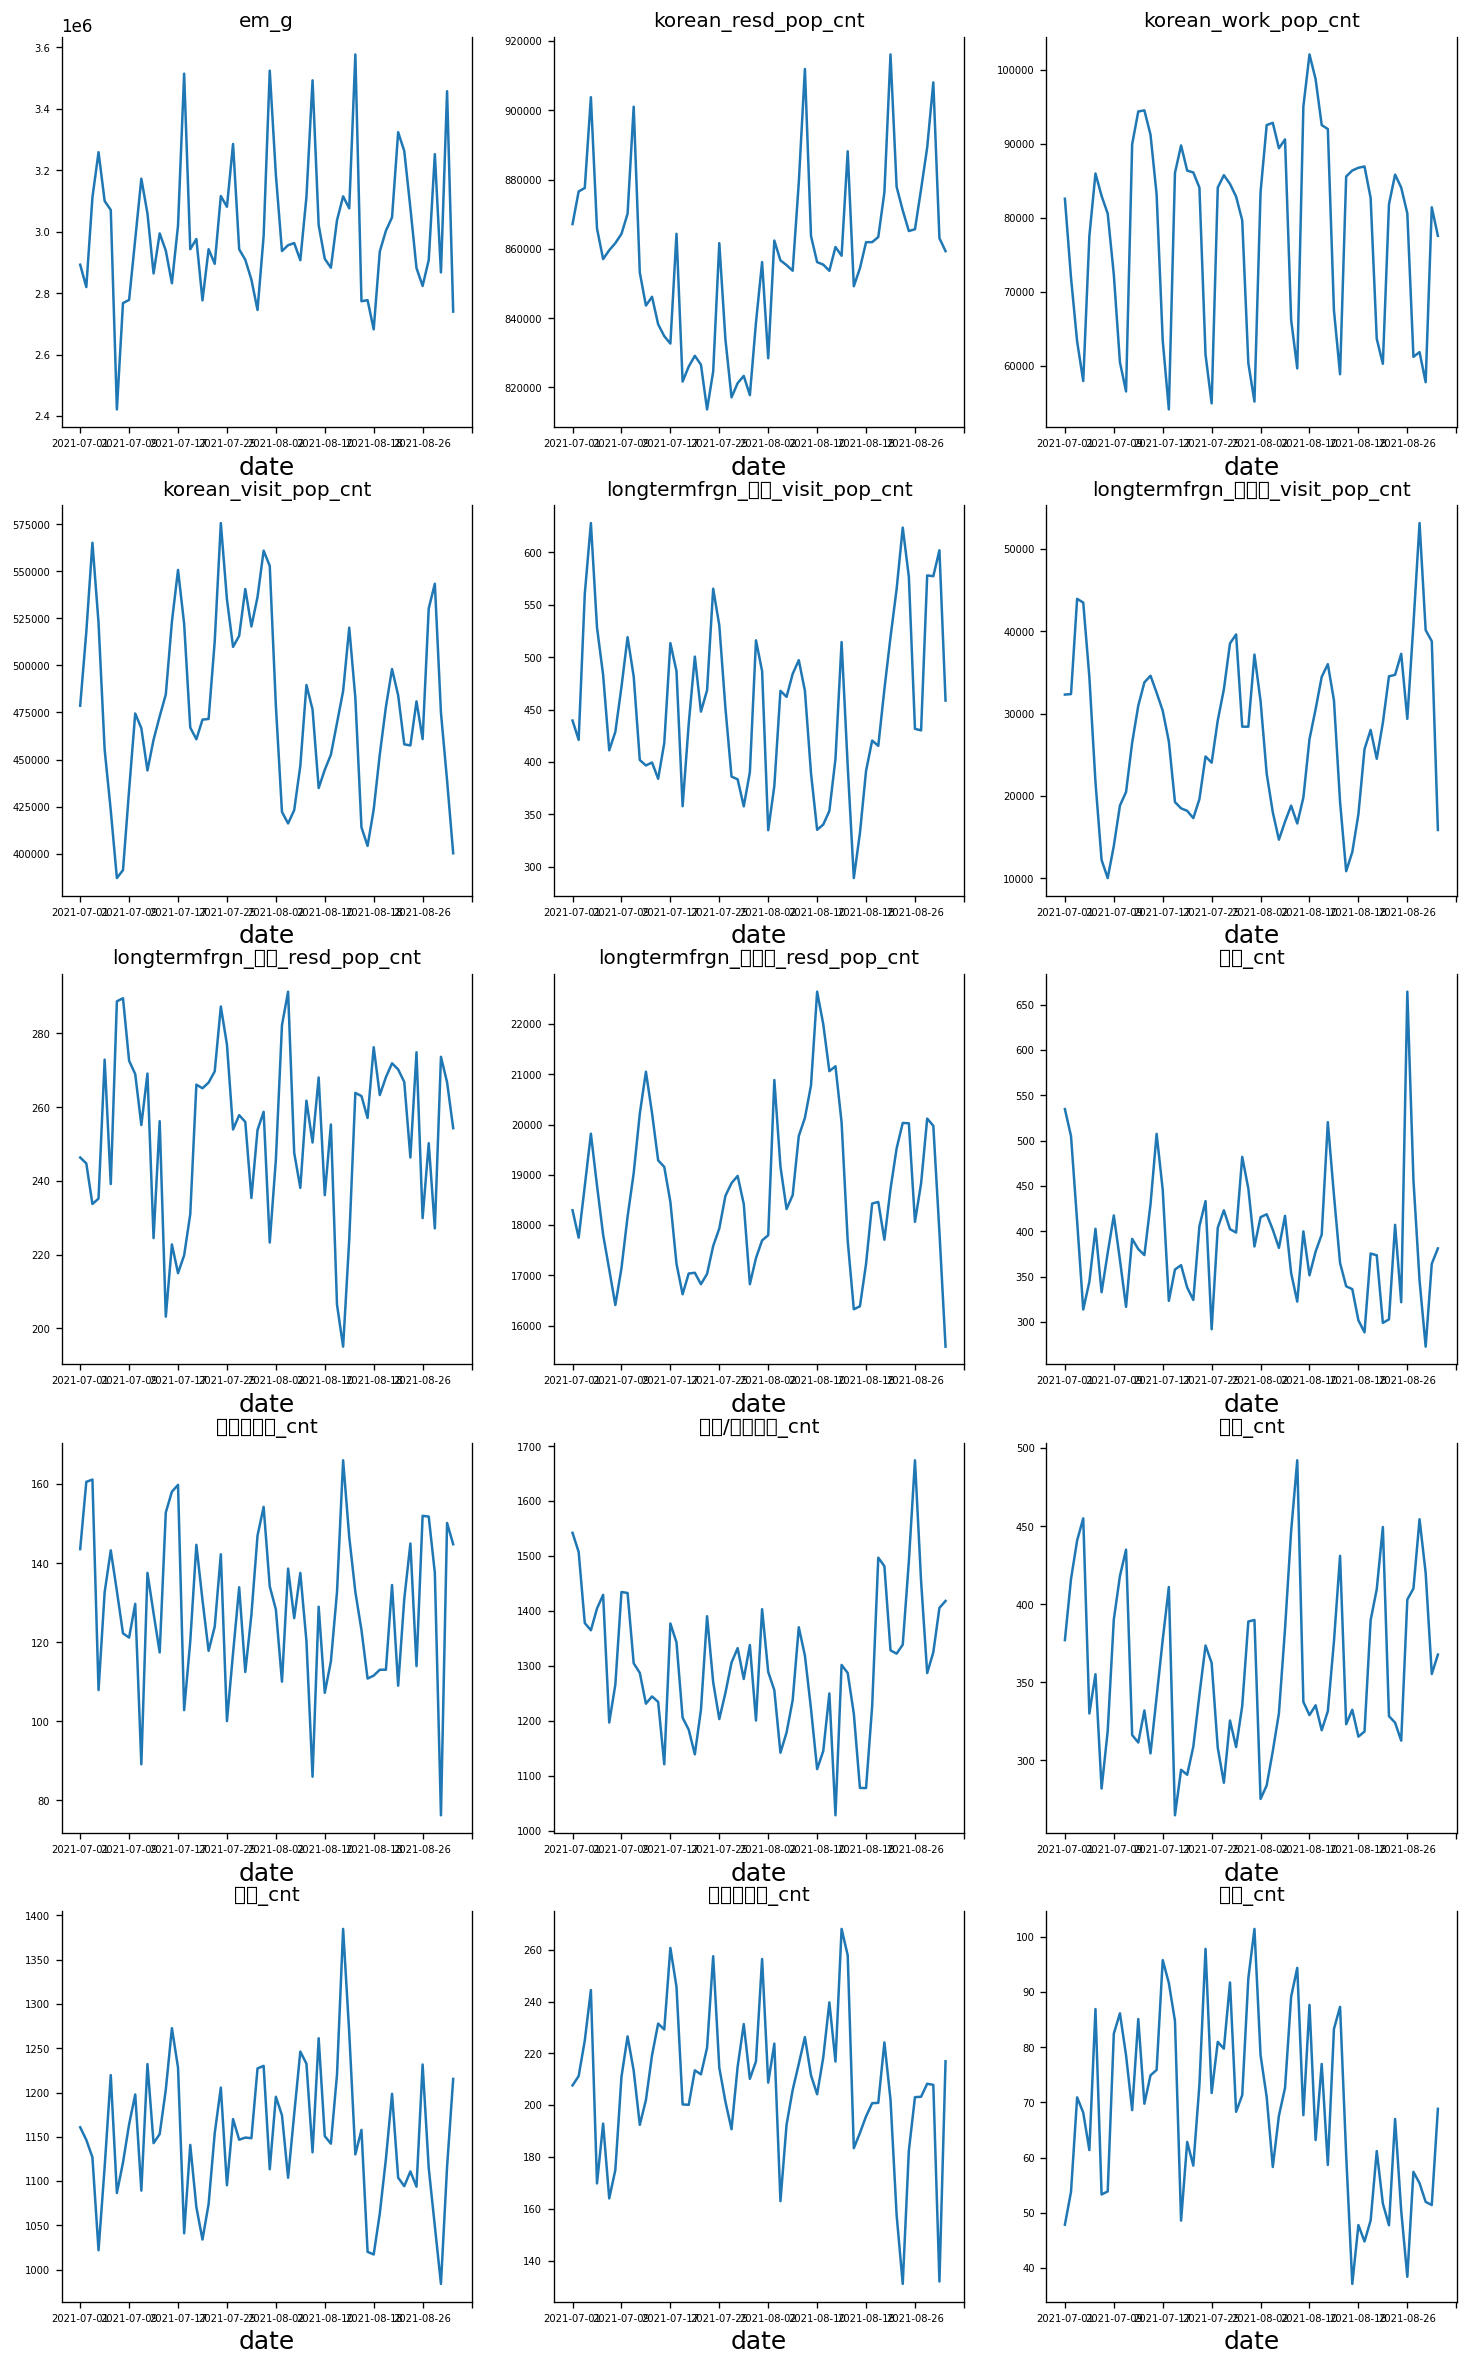

In [45]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(15,25))
for i, ax in enumerate(axes.flatten()):
    x = 애월읍_predict['base_date']
    data = 애월읍_predict[애월읍_predict.columns[i+2]]
    ax.plot(x, data)
    ax.set_title(애월읍_predict.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()